## Customer Segmentation

---

## Planning

**1. Exploratory Data Analysis**

- Understand nature of data (describe, info, value counts)
- Histograms

**2. Data Preprocessing**

- Extract numerical features
- Standardize these features

**3. Clustering**
- Elbow method to determine optimal clusters
- K-means method
- Agglomerative method

**4. Analysis**
- Cluster analysis

---

## 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator


df = pd.read_csv('data/data.csv').drop('ID', axis = 1) #drop ID

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [3]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
for i in ['Sex','Marital status','Occupation','Settlement size','Education']:
    print(df[i].value_counts())
    print("Mode: ", df[i].mode()[0],"\n")

0    1086
1     914
Name: Sex, dtype: int64
Mode:  0 

0    1007
1     993
Name: Marital status, dtype: int64
Mode:  0 

1    1113
0     633
2     254
Name: Occupation, dtype: int64
Mode:  1 

0    989
1    544
2    467
Name: Settlement size, dtype: int64
Mode:  0 

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64
Mode:  1 



In [4]:
print("Median Age: ", df['Age'].median())
print("Median Income: ", df['Income'].median())

Median Age:  33.0
Median Income:  115548.5


<AxesSubplot:xlabel='Income', ylabel='Count'>

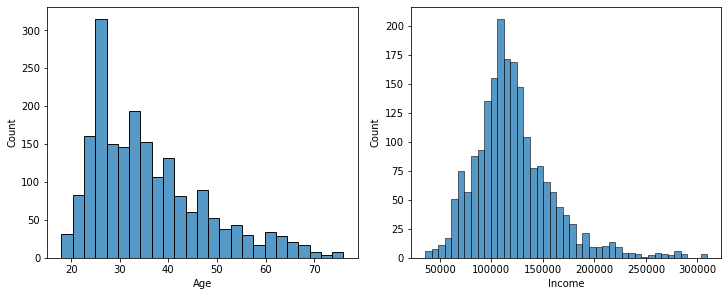

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

sns.histplot(df['Age'], ax=ax[0], color="C0")
sns.histplot(df['Income'], ax=ax[1], color="C0")

C:\Users\tozhy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tozhy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tozhy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tozhy\anaconda3\lib\si

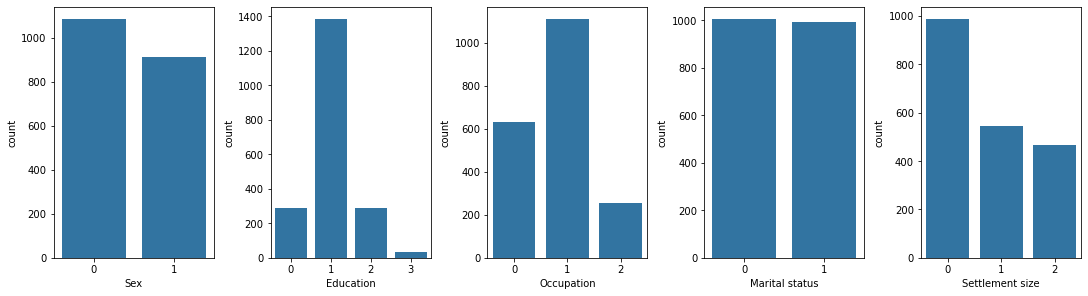

In [7]:
fig, ax =plt.subplots(1,5, figsize=(15, 4), constrained_layout=True)
sns.countplot(df['Sex'], ax=ax[0], color="C0")
sns.countplot(df['Education'], ax=ax[1], color="C0")
sns.countplot(df['Occupation'], ax=ax[2], color="C0")
sns.countplot(df['Marital status'], ax=ax[3], color="C0")
sns.countplot(df['Settlement size'], ax=ax[4], color="C0")
fig.show()

---

## 2. Data Preprocessing

In [8]:
X = df.loc[:,['Age', 'Income']].values #Extract numerical features

In [9]:
#Scale numerical features
X_s = StandardScaler().fit(X) 
X_scaled = X_s.transform(X)
X_scaled

array([[ 2.65361447,  0.09752361],
       [-1.18713209,  0.78265438],
       [ 1.11731585, -0.83320224],
       ...,
       [-0.41898277, -0.90695688],
       [-1.01643224, -0.60332923],
       [-0.93108232, -1.3789866 ]])

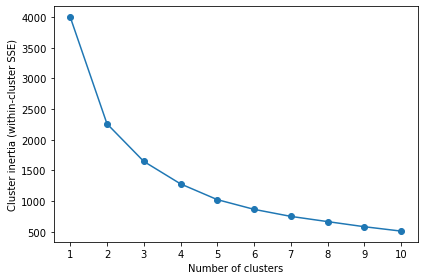

In [10]:
#Elbow method to determine optimal clusters

inertias = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0).fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
plt.show()

---

## 3. Clustering

In [34]:
n = 3 #cluster number

In [35]:
#Kmeans method

km = KMeans(n_clusters=n, 
            init='k-means++',
            n_init=10,      
            max_iter=300,   
            random_state=1)

y_km = km.fit_predict(X_scaled)
df['kmean'] = y_km

print(y_km)
y_centre = X_s.inverse_transform(km.cluster_centers_)
print(f'\nClusters:\n {y_centre}')

[2 1 2 ... 0 0 0]

Clusters:
 [[2.97043765e+01 1.01480718e+05]
 [3.58314607e+01 1.74678191e+05]
 [5.33256351e+01 1.31247695e+05]]


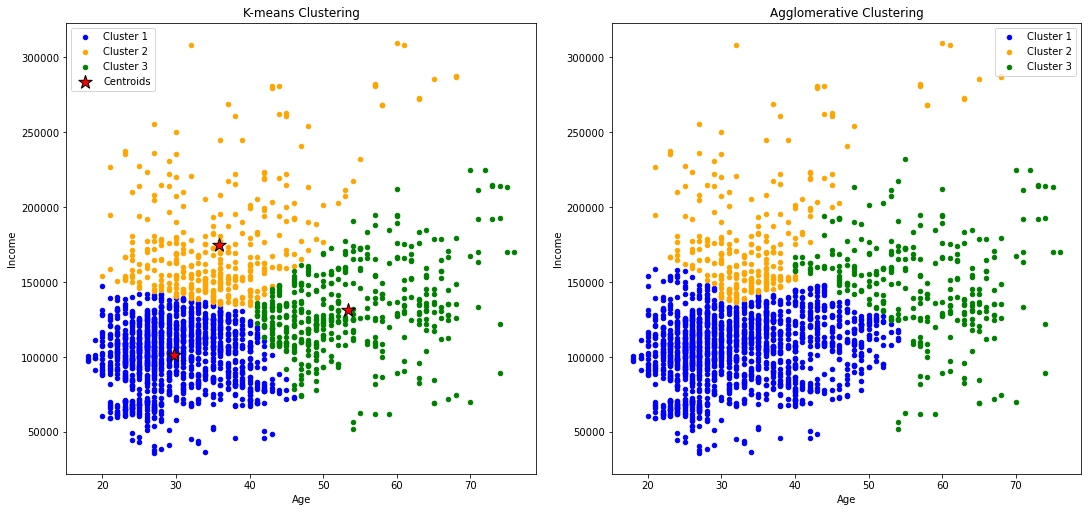

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7), constrained_layout=True)

ax[0].scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=20, c='blue', label='Cluster 1')
ax[0].scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=20, c='orange',label='Cluster 2')
ax[0].scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=20, c='green', label='Cluster 3')

ax[0].set_title('K-means Clustering')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Income')

ax[0].scatter(y_centre[:, 0], y_centre[:, 1], s=200, marker='*', c='red', edgecolor='black', label='Centroids')

ax[0].legend(scatterpoints=1)


#Agglomerative method

ac = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X_scaled)

df['agglo'] = y_ac

#Numbers out of order to colour match
ax[1].scatter(X[y_ac == 2, 0], X[y_ac == 2, 1], s=20, c='blue', label='Cluster 1')
ax[1].scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], s=20, c='orange', label='Cluster 2')
ax[1].scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], s=20, c='green', label='Cluster 3')

ax[1].set_title('Agglomerative Clustering')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Income')

ax[1].legend(scatterpoints=1)

plt.show()

---

## 4. Analysis

In [79]:
#compare size of clusters

for i in ['kmean','agglo']:
    print(df[i].value_counts())

0    1212
2     434
1     354
Name: kmean, dtype: int64
2    1468
1     276
0     256
Name: agglo, dtype: int64


In [63]:
#Seperate each cluster into individual dataframe for kmeans method

df0 = df[df['kmean']==0]
df1 = df[df['kmean']==1]
df2 = df[df['kmean']==2]

#Seperate each cluster into individual dataframe for agglomerative method
#Numbers out of order to colour match

df3 = df[df['agglo']==2]
df4 = df[df['agglo']==0]
df5 = df[df['agglo']==1]

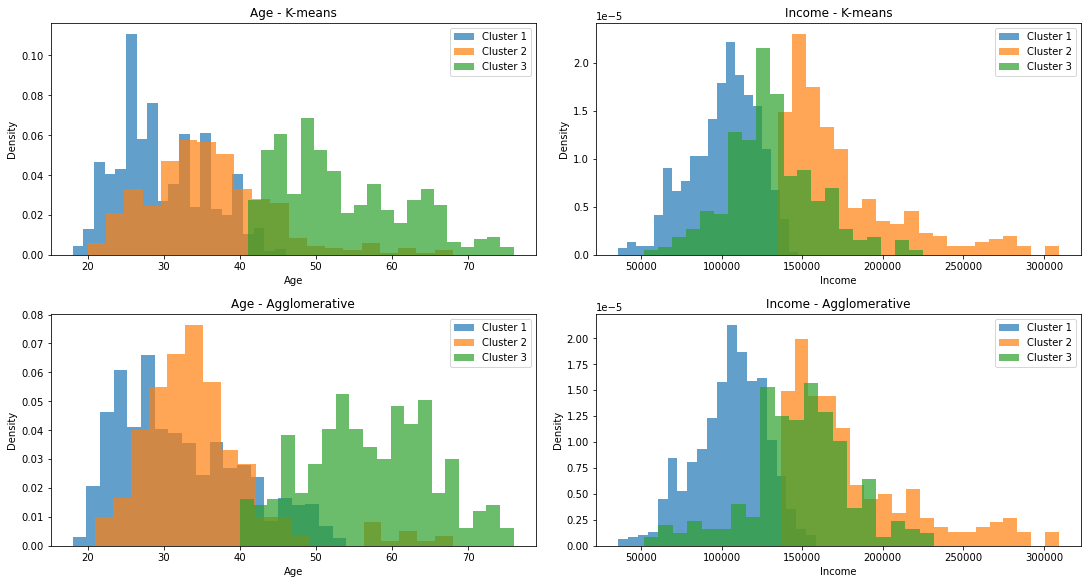

In [77]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8), constrained_layout=True)

ax[0][0].hist(df0['Age'], density = True, alpha=0.7, label='Cluster 1', bins=20)
ax[0][0].hist(df1['Age'], density = True, alpha=0.7, label='Cluster 2', bins=20)
ax[0][0].hist(df2['Age'], density = True, alpha=0.7, label='Cluster 3', bins=20)

ax[0][0].set_title('Age - K-means')
ax[0][0].set_xlabel('Age')
ax[0][0].set_ylabel('Density')
ax[0][0].legend(loc='upper right')

ax[0][1].hist(df0['Income'], density = True, alpha=0.7, label='Cluster 1', bins=20)
ax[0][1].hist(df1['Income'], density = True, alpha=0.7, label='Cluster 2', bins=20)
ax[0][1].hist(df2['Income'], density = True, alpha=0.7, label='Cluster 3', bins=20)

ax[0][1].set_title('Income - K-means')
ax[0][1].set_xlabel('Income')
ax[0][1].set_ylabel('Density')
ax[0][1].legend(loc='upper right')

ax[1][0].hist(df3['Age'], density = True, alpha=0.7, label='Cluster 1', bins=20)
ax[1][0].hist(df4['Age'], density = True, alpha=0.7, label='Cluster 2', bins=20)
ax[1][0].hist(df5['Age'], density = True, alpha=0.7, label='Cluster 3', bins=20)

ax[1][0].set_title('Age - Agglomerative')
ax[1][0].set_xlabel('Age')
ax[1][0].set_ylabel('Density')
ax[1][0].legend(loc='upper right')

ax[1][1].hist(df3['Income'], density = True, alpha=0.7, label='Cluster 1', bins=20)
ax[1][1].hist(df4['Income'], density = True, alpha=0.7, label='Cluster 2', bins=20)
ax[1][1].hist(df5['Income'], density = True, alpha=0.7, label='Cluster 3', bins=20)

ax[1][1].set_title('Income - Agglomerative')
ax[1][1].set_xlabel('Income')
ax[1][1].set_ylabel('Density')
ax[1][1].legend(loc='upper right')


plt.show()

In [41]:
print('K-means - Cluster 1')
print("Median Age: ", df0['Age'].median())
print("Median Income: ", df0['Income'].median(), "\n")

print('K-means - Cluster 2')
print("Median Age: ", df1['Age'].median())
print("Median Income: ", df1['Income'].median(), "\n")

print('K-means - Cluster 3')
print("Median Age: ", df2['Age'].median())
print("Median Income: ", df2['Income'].median(), "\n")

print('Agglomerative - Cluster 1')
print("Median Age: ", df3['Age'].median())
print("Median Income: ", df3['Income'].median(), "\n")

print('Agglomerative - Cluster 2')
print("Median Age: ", df4['Age'].median())
print("Median Income: ", df4['Income'].median(), "\n")

print('Agglomerative - Cluster 3')
print("Median Age: ", df5['Age'].median())
print("Median Income: ", df5['Income'].median(), "\n")


K-means - Cluster 1
Median Age:  28.0
Median Income:  104292.0 

K-means - Cluster 2
Median Age:  35.0
Median Income:  162483.0 

K-means - Cluster 3
Median Age:  51.0
Median Income:  127788.5 

Agglomerative - Cluster 1
Median Age:  30.0
Median Income:  107466.5 

Agglomerative - Cluster 2
Median Age:  34.0
Median Income:  168882.5 

Agglomerative - Cluster 3
Median Age:  57.0
Median Income:  150059.0 



In [42]:
#drop unnecessary columns

df0 = df0.drop(['agglo','kmean','Income','Age'], axis = 1)
df1 = df1.drop(['agglo','kmean','Income','Age'], axis = 1)
df2 = df2.drop(['agglo','kmean','Income','Age'], axis = 1)

df3 = df3.drop(['agglo','kmean','Income','Age'], axis = 1)
df4 = df4.drop(['agglo','kmean','Income','Age'], axis = 1)
df5 = df5.drop(['agglo','kmean','Income','Age'], axis = 1)

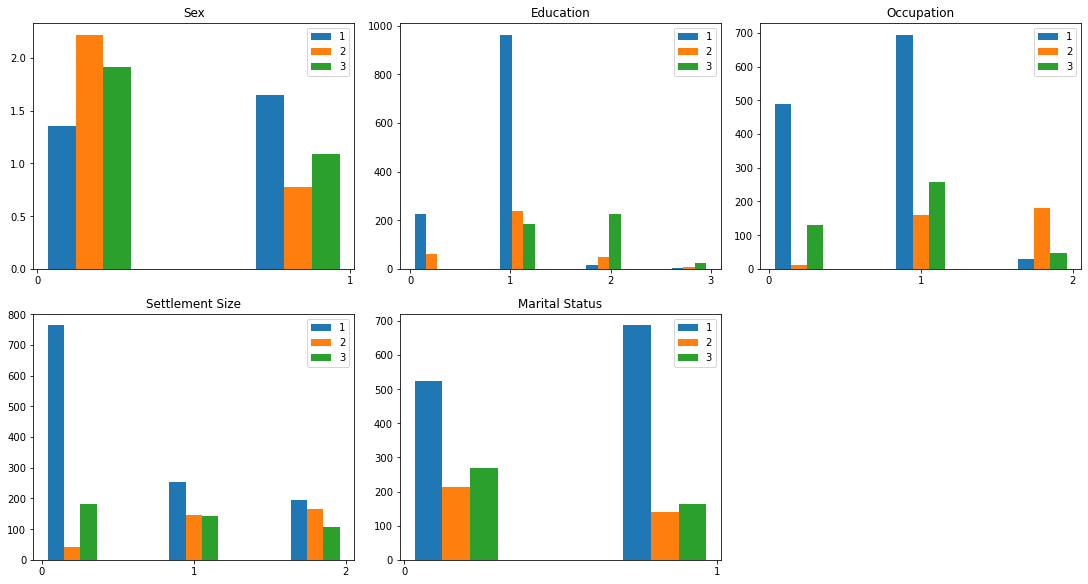

In [56]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
fig.delaxes(axs[1][2])

axs[0][0].hist([df0['Sex'], df1['Sex'], df2['Sex']],3,density = True, label=['1', '2', '3'])
axs[0][0].legend(loc='upper right')
axs[0][0].set_title('Sex')
axs[0][0].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[0][1].hist([df0['Education'], df1['Education'], df2['Education']],7, density = False, label=['1', '2', '3'])
axs[0][1].legend(loc='upper right')
axs[0][1].set_title('Education')
axs[0][1].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[0][2].hist([df0['Occupation'], df1['Occupation'], df2['Occupation']],5, density = False, label=['1', '2', '3'])
axs[0][2].legend(loc='upper right')
axs[0][2].set_title('Occupation')
axs[0][2].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[1][0].hist([df0['Settlement size'], df1['Settlement size'], df2['Settlement size']],5, density = False, label=['1', '2', '3'])
axs[1][0].legend(loc='upper right')
axs[1][0].set_title('Settlement Size')
axs[1][0].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[1][1].hist([df0['Marital status'], df1['Marital status'], df2['Marital status']],3, density = False, label=['1', '2', '3'])
axs[1][1].legend(loc='upper right')
axs[1][1].set_title('Marital Status')
axs[1][1].xaxis.set_major_locator(MaxNLocator(integer=True))

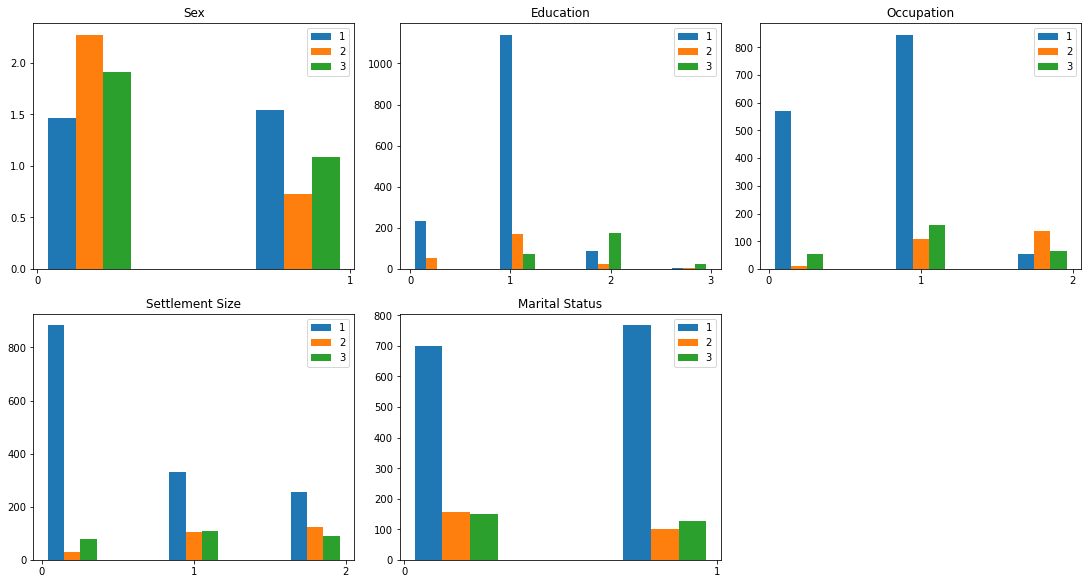

In [57]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
fig.delaxes(axs[1][2])

axs[0][0].hist([df3['Sex'], df4['Sex'], df5['Sex']],3,density = True, label=['1', '2', '3'])
axs[0][0].legend(loc='upper right')
axs[0][0].set_title('Sex')
axs[0][0].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[0][1].hist([df3['Education'], df4['Education'], df5['Education']],7, density = False, label=['1', '2', '3'])
axs[0][1].legend(loc='upper right')
axs[0][1].set_title('Education')
axs[0][1].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[0][2].hist([df3['Occupation'], df4['Occupation'], df5['Occupation']],5, density = False, label=['1', '2', '3'])
axs[0][2].legend(loc='upper right')
axs[0][2].set_title('Occupation')
axs[0][2].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[1][0].hist([df3['Settlement size'], df4['Settlement size'], df5['Settlement size']],5, density = False, label=['1', '2', '3'])
axs[1][0].legend(loc='upper right')
axs[1][0].set_title('Settlement Size')
axs[1][0].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[1][1].hist([df3['Marital status'], df4['Marital status'], df5['Marital status']],3, density = False, label=['1', '2', '3'])
axs[1][1].legend(loc='upper right')
axs[1][1].set_title('Marital Status')
axs[1][1].xaxis.set_major_locator(MaxNLocator(integer=True))